# 

![](1.png)


![](2.png)


### Importing Libraries 

In [17]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import iqr
import seaborn as sns

### Data Overview 

In [2]:
# Load data from a CSV file using pandas
data = pd.read_csv("project.csv", sep=";")

# Display the first few rows of the DataFrame
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Display the first few rows of the new DataFrame
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Calculate the number of missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Filling the missing values
The missing values are in the income column only. In order to fill these null values, we inspect the correlation between the income column and the other columns.

In [5]:
data[data.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15.11.2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20.02.2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,5.11.2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,1.01.2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17.06.2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14.09.2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19.11.2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27.05.2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23.11.2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11.07.2013,23,352,...,6,0,0,0,0,0,0,3,11,0


The correlation is highest in the "NumCatalogPurchases" column. We will group the incomes based on this column, and fill the null values accordingly.

In [6]:
data.corr()["Income"].sort_values()

C:\Users\Beyza\AppData\Local\Temp\ipykernel_12188\2614438908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Income"].sort_values()


NumWebVisitsMonth     -0.553088
Kidhome               -0.428669
Year_Birth            -0.161791
NumDealsPurchases     -0.083101
Complain              -0.027225
AcceptedCmp3          -0.016174
Recency               -0.003970
ID                     0.013095
Teenhome               0.019133
AcceptedCmp2           0.087545
Response               0.133047
AcceptedCmp4           0.184400
AcceptedCmp1           0.276820
MntGoldProds           0.325916
AcceptedCmp5           0.335943
NumWebPurchases        0.387878
MntFruits              0.430842
MntFishProducts        0.438871
MntSweetProducts       0.440744
NumStorePurchases      0.529362
MntWines               0.578650
MntMeatProducts        0.584633
NumCatalogPurchases    0.589162
Income                 1.000000
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64

In [7]:
group_means=data.groupby('NumCatalogPurchases')["Income"].mean()
data['Income'] = data.apply(
    lambda row: group_means[row['NumCatalogPurchases']] if pd.isna(row['Income']) else row['Income'],
    axis=1)

In [8]:
# Generate descriptive statistics for the DataFrame 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52188.298836,25092.934032,1730.0,35178.00,51342.0,68468.25,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


C:\Users\Beyza\AppData\Local\Temp\ipykernel_12188\2917564468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


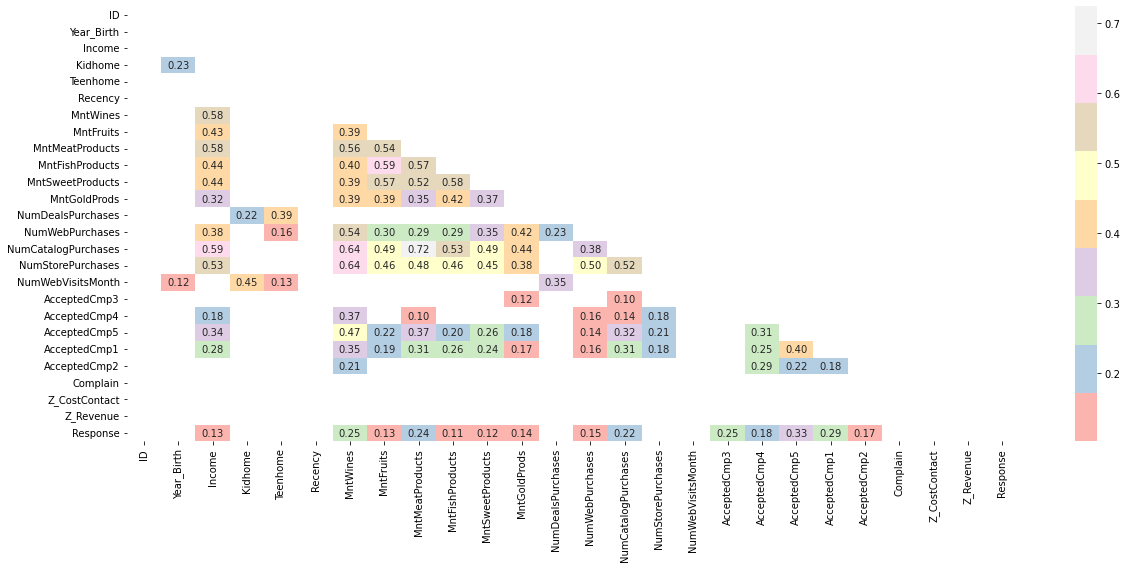

In [9]:
# Calculate the correlation matrix for the DataFrame
corr_matrix = data.corr()

# Set a threshold value for correlation
threshold = 0.1

# Create a mask to hide the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Filter the correlation matrix to only include values above the threshold
high_corr = corr_matrix[corr_matrix > threshold]

# Create a heatmap to visualize the high correlation values
plt.figure(figsize=(20, 8))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="Pastel1", mask=mask)

# Display the heatmap
plt.show()

In [10]:
# Remove duplicate rows from the DataFrame while keeping the first occurrence of each duplicated row
data.drop_duplicates(subset=data.columns, keep="first", inplace=True)

In [11]:
# Remove rows with missing values from the DataFrame 
data.dropna(inplace=True)

In [12]:
# Calculate the age of the customers
data["age"] = 2023 - data["Year_Birth"]


# Calculate the total amount spent by customers
data["total_spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Categorize marital status into "Alone" or "Partner"
data["with"] = data["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", 
                                               "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"})

# Calculate the number of children in the family
data["children"] = data["Kidhome"] + data["Teenhome"]


# Calculate family size based on the "with" and "children" columns
data["family_size"] = data["with"].replace({"Alone": 1, "Partner": 2}) + data["children"]


# Determine if a customer is a parent (has children)
data["is_parent"] = np.where(data.children > 0, 1, 0)


# Categorize education level into "Undergraduate," "Graduate," or "Postgraduate"
data["education"] = data["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", 
                                               "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

# Calculate the total number of acceptions
data['total_accepted'] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]


# List of columns to drop from the DataFrame
to_drop = ["Education", "Marital_Status", "Dt_Customer", "Year_Birth", 
           "ID", "with", "Z_CostContact", "Z_Revenue", "Teenhome", "Kidhome",
           "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]


# Drop the specified columns from the DataFrame
data.drop(to_drop, axis=1, inplace=True)

In [13]:
#Columns are renamed
new_column_names = ["income", "recency", "wine_num", "fruit_num", "meat_num", "fish_num","sweet_num", 
                    "gold_num", "dis_num", "web_num", "cat_num", "store_num","visit_num", "complain",
                    "accept_last", "age", "total_spent", "children", "family_size", "is_parent",
                    "education",'total_accepted']  

data.columns = new_column_names

![](4.png)


In [14]:
# Define a function to categorize columns into categorical and numerical based on unique values
def col_names(dataframe, cat_th=10, car_th=200):
    
    # Get columns with data types "category," "bool," or "object" as categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    
    # Identify numerical columns with a unique value count less than the specified threshold
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    # Add the numerical-but-categorical columns to the categorical columns
    cat_cols = cat_cols + num_but_cat
    
    # Get columns with numerical data types
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    # Exclude the numerical-but-categorical columns from the numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols

# Call the function to categorize columns in the 'data' DataFrame
cat_cols, num_cols = col_names(data)

Our data is a very full data set. It contains 24 null values in just one column. Therefore, since it would not have a big impact, we cleaned it from the data set by dropping it directly.Since all columns were of the required type, we did not need any extra processing here.Since there are no significant and striking columns in the correlations, we did not do much with this.We have determined our categorical and numerical columns to facilitate future transactions.

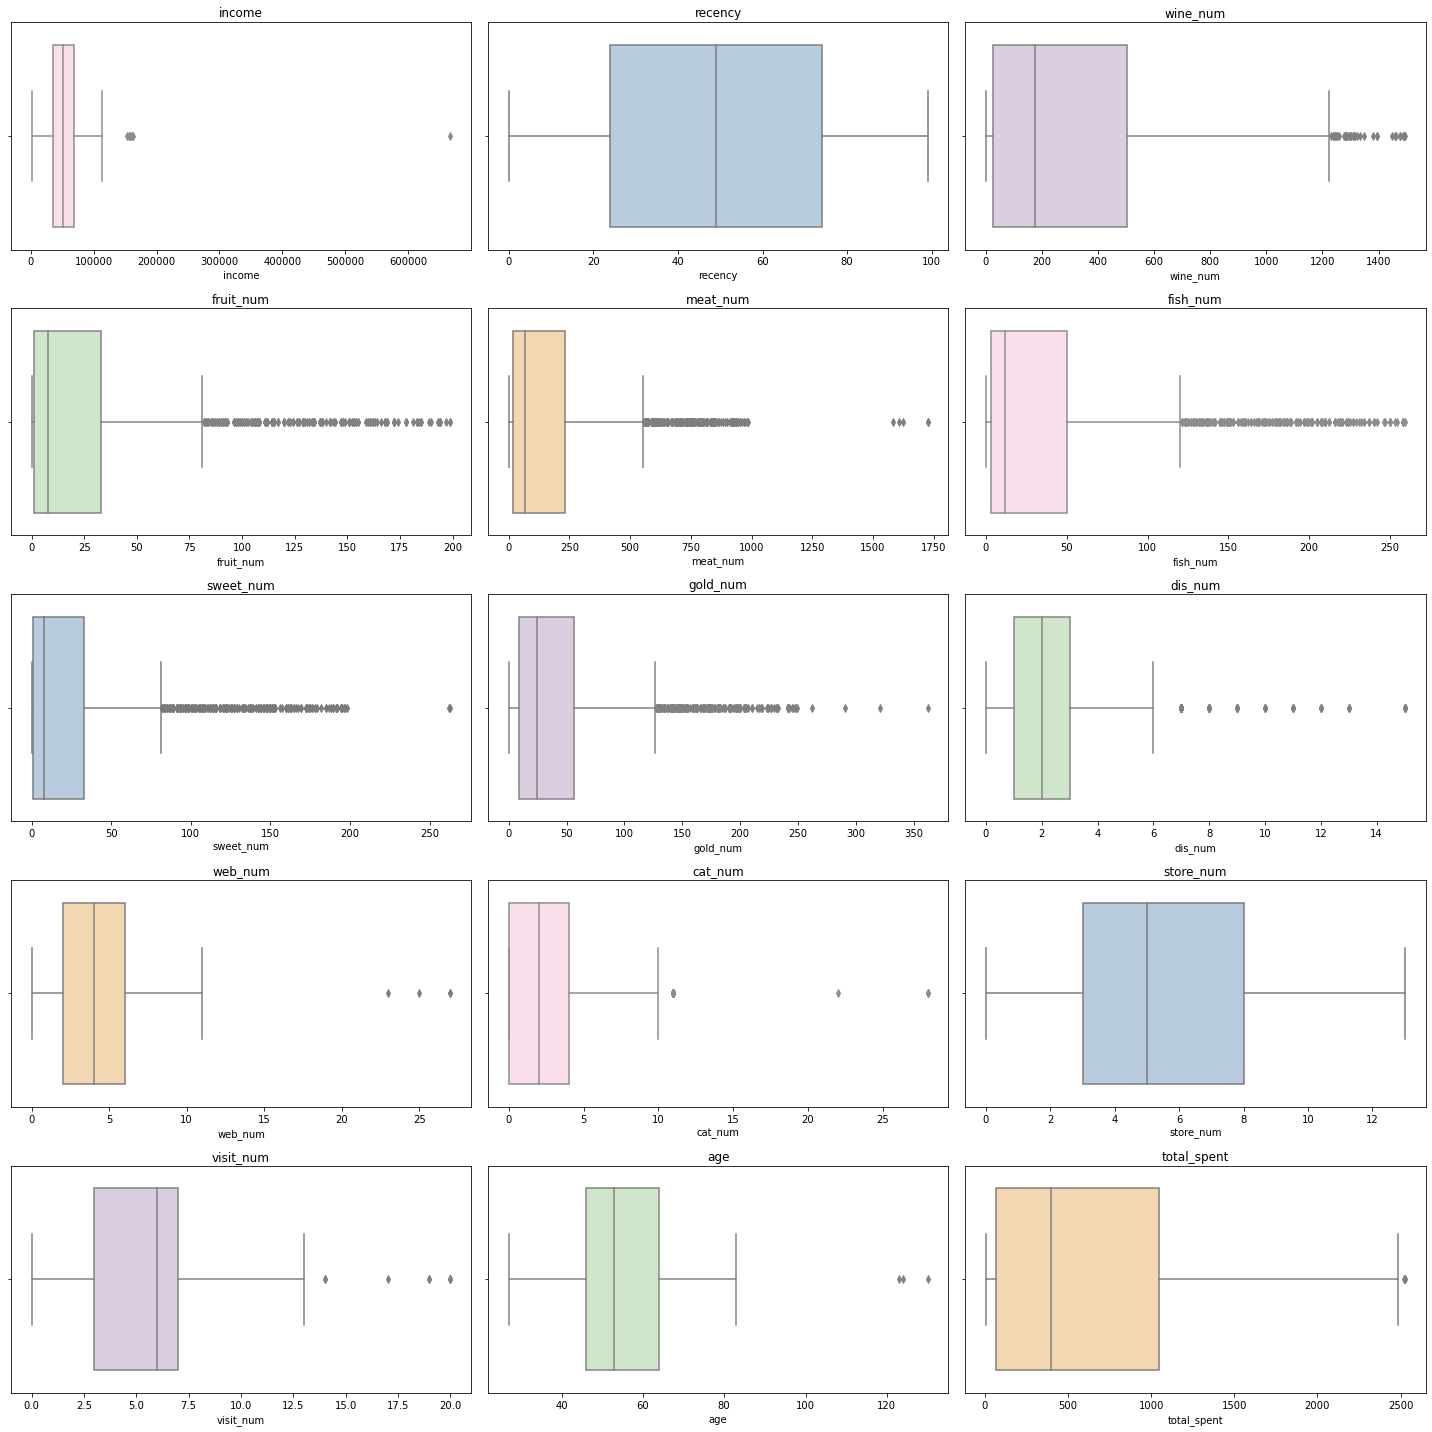

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if data and num_cols exist
if 'data' in locals() and 'num_cols' in locals():
    # Check if data is not empty
    if not data.empty:
        # Check data types of numerical columns
        numerical_columns = data[num_cols].select_dtypes(include=['float64', 'int64']).columns
        if not numerical_columns.empty:
            # Create a layout with 5 rows and 3 columns for subplots
            fig, axes = plt.subplots(5, 3, figsize=(20, 20))

            # Initialize an index to track the numerical column being processed
            index = 0

            # Define your custom color codes (in hex format)
            colors = ['#FDDAEC', '#B3CDE3', '#DECBE4', '#CCEBC5', '#FED9A6',
                     '#FDDAEC', '#B3CDE3', '#DECBE4', '#CCEBC5', '#FED9A6',
                     '#FDDAEC', '#B3CDE3', '#DECBE4', '#CCEBC5', '#FED9A6']

            # Check if the column exists in the DataFrame before creating the box plot
            for i in range(5):
                for j in range(3):
                    if index < len(numerical_columns):
                        sns.boxplot(x=data[numerical_columns[index]], ax=axes[i, j], color=colors[index])  
                        axes[i, j].set_title(numerical_columns[index])  # Set the title of each plot to the column name
                        index += 1

            plt.tight_layout()
            plt.show()
        else:
            print("No numerical columns found in the specified columns.")
    else:
        print("The DataFrame is empty.")
else:
    print("Ensure that 'data' and 'num_cols' variables are defined.")


In [24]:
from scipy.stats import iqr

for col in num_cols:
    # Calculate the IQR for the current numerical column
    column_values = data[col].dropna().values
    out = iqr(column_values)

    # Calculate the lower and upper threshold values for outliers
    quantile1 = data[col].quantile(0.09)  # Lower quartile value
    quantile3 = data[col].quantile(0.91)  # Upper quartile value
    interquantile_range = quantile3 - quantile1
    low_limit = quantile1 - 1.5 * interquantile_range  # Lower threshold for outliers
    up_limit = quantile3 + 1.5 * interquantile_range  # Upper threshold for outliers

    # Count and print the number of outliers for the column
    outliers_num = len(data[(data[col] < low_limit) | (data[col] > up_limit)])
    print(f"{col}   outliers_num = {outliers_num}", f"{col}   upper_limit = {up_limit}")

income   outliers_num = 1 income   upper_limit = 165949.11000000002
recency   outliers_num = 0 recency   upper_limit = 213.0
wine_num   outliers_num = 0 wine_num   upper_limit = 2142.2250000000004
fruit_num   outliers_num = 0 fruit_num   upper_limit = 222.5
meat_num   outliers_num = 5 meat_num   upper_limit = 1304.625
fish_num   outliers_num = 0 fish_num   upper_limit = 325.0
sweet_num   outliers_num = 2 sweet_num   upper_limit = 233.72500000000002
gold_num   outliers_num = 2 gold_num   upper_limit = 318.0
dis_num   outliers_num = 14 dis_num   upper_limit = 11.0
web_num   outliers_num = 4 web_num   upper_limit = 18.5
cat_num   outliers_num = 4 cat_num   upper_limit = 17.5
store_num   outliers_num = 0 store_num   upper_limit = 24.5
visit_num   outliers_num = 5 visit_num   upper_limit = 17.0
age   outliers_num = 3 age   upper_limit = 120.5
total_spent   outliers_num = 0 total_spent   upper_limit = 3890.7250000000004


In [25]:
data["income"] = np.where(data["income"] > 300000, 300000 ,data["income"])
data["age"] = np.where(data["age"] > 100, 90 ,data["age"])

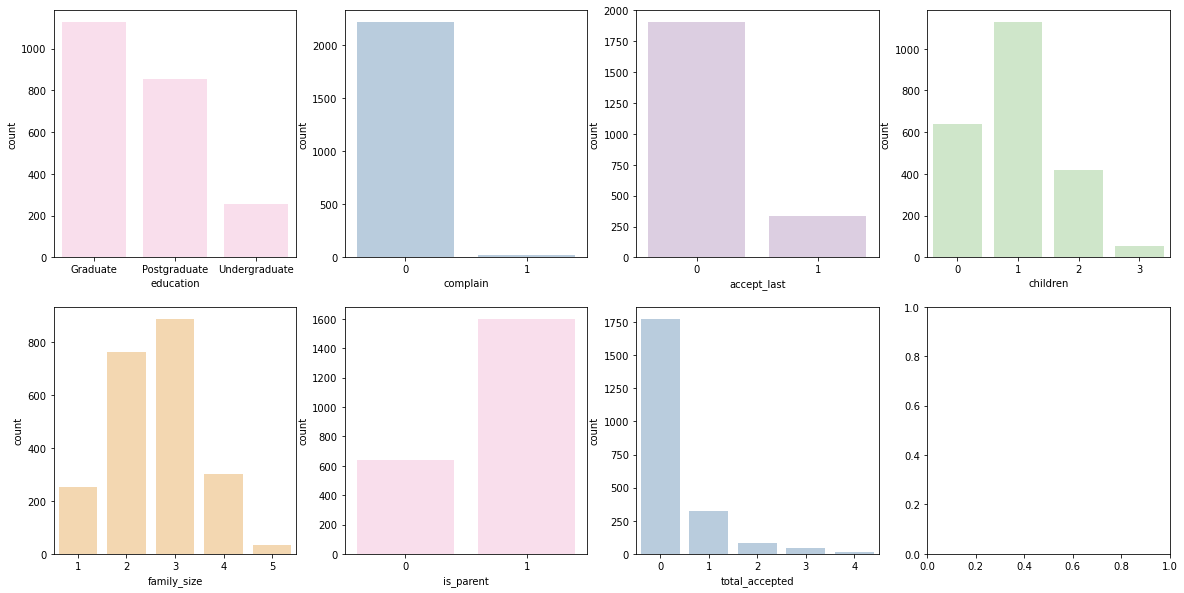

In [26]:
# Define the color codes
colors = ['#FDDAEC', '#B3CDE3', '#DECBE4', '#CCEBC5', '#FED9A6', '#FDDAEC', '#B3CDE3']

# Create a separate subplot for each categorical column
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Create a 2 rows, 4 columns subplot layout

for i, n in enumerate(cat_cols):
    # Draw the column with the specified number and color code using Seaborn
    sns.countplot(x=n, data=data, palette=[colors[i]], ax=axes[i // 4, i % 4])

# Show all the plots
plt.show()

[](!3.png)

![](3.png)


We created new columns by categorizing some of our important columns and combining them with other related columns. We replaced the difficult to understand column names with new ones. We used the iqr method to detect outliers. Since there are not many and not very important columns, we made arrangements only in 2 basic columns in order not to spoil the originality of the data.

In [27]:
data.to_csv('311project_data.csv', index=False)